<a href="https://colab.research.google.com/github/RajeshTechForge/Real-Estate-Price-Predictor/blob/main/Quick_Look_on_Data_%26_Spliting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting Google Drive
> I’ve stored my dataset on Google Drive and am now integrating it with Colab for seamless access and analysis.

In [22]:
from google.colab import drive
drive.mount("/content/drive")
path = "drive/My Drive/ML Practice/Model 3/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required modules

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, csv
from geopy.geocoders import Nominatim

Load the dataset dataset from the specified path

In [24]:
housingData = pd.read_csv(path + "Real_Estate_Sales_2001-2020_GL.csv")
housingData.head(8)

,Unnamed: 0,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Full Address
0,0,2020,9/13/2021,150500,325000.0,0.4630,Commercial,Nan,1,"230 WAKELEE AVE, Ansonia"
1,1,2020,10/2/2020,253000,430000.0,0.5883,Residential,Single Family,0,"390 TURNPIKE RD, Ashford"
2,2,2020,3/9/2021,130400,179900.0,0.7248,Residential,Condo,1,"5 CHESTNUT DRIVE, Avon"
3,3,2020,4/13/2021,619290,890000.0,0.6958,Residential,Single Family,1,"111 NORTHINGTON DRIVE, Avon"
4,4,2020,7/2/2021,862330,1447500.0,0.5957,Residential,Single Family,1,"70 FAR HILLS DRIVE, Avon"
5,5,2020,12/9/2020,847520,1250000.0,0.6780,Residential,Single Family,0,"57 FAR HILLS DRIVE, Avon"
6,6,2020,3/1/2021,234200,130000.0,1.8015,Residential,Two Family,1,"1539 FARMINGTON AVE, Berlin"
7,7,2020,7/1/2021,412000,677500.0,0.6081,Residential,Single Family,1,"216 WATCH HILL RD, Berlin"


### Taking a Quick look on data + Making Assumption

In [25]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997213 non-null  object 
 3   Assessed Value    997213 non-null  int64  
 4   Sale Amount       997213 non-null  float64
 5   Sales Ratio       997213 non-null  float64
 6   Property Type     997213 non-null  object 
 7   Residential Type  997213 non-null  object 
 8   Years until sold  997213 non-null  int64  
 9   Full Address      997213 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.1+ MB


In [26]:
housingData.describe()

,Unnamed: 0,List Year,Assessed Value,Sale Amount,Sales Ratio,Years until sold
count,997213.000000,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,498606.000000,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,287870.741332,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,249303.000000,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,498606.000000,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,747909.000000,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,997212.000000,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


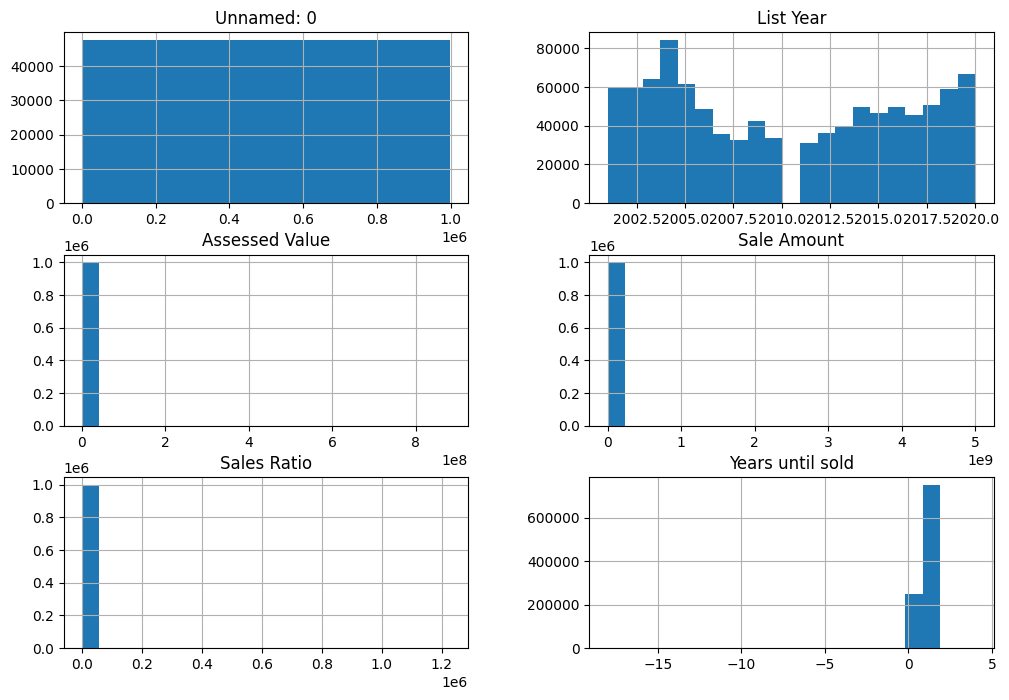

In [27]:
# Sturges’ formula
n = int(np.ceil(1 + np.log2(len(housingData))))
housingData.hist(bins=n, figsize=(12, 8))
plt.show()

Guided by the instructions in the book, my first step will be to establish a Test Set before proceeding with any further actions. Since the dataset is big enough, we’re setting aside **20% as Test Set** to make sure we evaluate it thoroughly

To split Dataset I am using **sklearn**

In [28]:
from sklearn.model_selection import train_test_split

trainSet, testSet = train_test_split(housingData, test_size=0.2, random_state=42)

In [29]:
trainSet.head(5)

,Unnamed: 0,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Full Address
192271,192271,2003,7/29/2004,83350,193000.0,0.431865,Nan,Nan,1,"148 SOUTH RD, Bozrah"
791831,791831,2015,12/3/2015,193500,110000.0,1.759091,Single Family,Single Family,0,"7 SKYLINE DR, Sherman"
812083,812083,2016,8/17/2017,257880,390000.0,0.661231,Single Family,Single Family,1,"32 YORKTOWN CIRCLE, Trumbull"
610634,610634,2011,5/7/2012,493240,550000.0,0.896800,Single Family,Single Family,1,"8 CURTISS MEADOWS, Woodbury"
976751,976751,2019,1/28/2020,67360,114000.0,0.590900,Single Family,Single Family,1,"19 BRENTWOOD AVE, Waterbury"


In [30]:
testSet.head(5)

,Unnamed: 0,List Year,Date Recorded,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Years until sold,Full Address
972291,972291,2019,1/14/2020,41380,56693.0,0.729900,Nan,Nan,1,"7 RAPALLO AVE, Middletown"
580711,580711,2010,8/3/2011,120990,51000.0,2.372353,Two Family,Two Family,1,"179-4TH STREET, Bridgeport"
768231,768231,2015,4/21/2016,71500,105000.0,0.680952,Condo,Condo,1,"127 FLORENCE RD #2C, Branford"
205832,205832,2003,3/31/2004,127640,238000.0,0.536303,Nan,Nan,1,"70 PINE RD & 7 TOM RD, East Haddam"
674744,674744,2013,4/7/2014,19300,10000.0,1.930000,Single Family,Single Family,1,"14 OLD MILL RD #14, Clinton"


In [31]:
trainSet.to_csv(path + "training_dataset.csv", index=False)
testSet.to_csv(path + "testing_dataset.csv", index=False)